### Import the required libraries and modules that you would need.

In [249]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Read that data into Python and call the dataframe churnData.

In [250]:
churn = pd.read_csv('./files_for_lab/Customer-Churn.csv')
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


### Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [251]:
churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [252]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [253]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors = 'coerce')


### Check for null values in the dataframe. Replace the null values.

In [254]:
churn.isna().sum()/len(churn)

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [255]:
churn[churn['TotalCharges'].isna()]
# As tenure is 0, we will fill in nan as 0

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,Yes,No,Yes,Yes,Yes,No,Two year,52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,Yes,Yes,Yes,No,Yes,Yes,Two year,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,Yes,Yes,Yes,Yes,Yes,No,Two year,56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,No,Two year,73.35,NaN,No


In [256]:
churn['TotalCharges'] = churn['TotalCharges'].fillna(0)
churn[churn['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn


## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
### Scale the features either by using normalizer or a standard scaler.

In [257]:
numerical = churn.select_dtypes(include = np.number)
objects = churn.select_dtypes(include = object)

In [258]:
numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [259]:
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)
numerical_scaled = pd.DataFrame(numerical_scaled, columns= numerical.columns)
pd.DataFrame(numerical_scaled).head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,0.013889,0.115423,0.003437
1,0.0,0.472222,0.385075,0.217564
2,0.0,0.027778,0.354229,0.012453
3,0.0,0.625000,0.239303,0.211951
4,0.0,0.027778,0.521891,0.017462


### Split the data into a training set and a test set.

In [260]:
X = numerical_scaled
y = churn['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y)

### Fit a logistic regression model on the training data.

In [261]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)

predictions = LR.predict(X_test)
predictions

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

### Check the accuracy on the test data.

In [262]:
R2 = LR.score(X_test, y_test)
R2

0.78137421919364

In [263]:
cm = confusion_matrix(y_test, predictions)

## Managing imbalance in the dataset
### Check for the imbalance.

In [264]:
churn.Churn.value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [265]:
churn_scaled = pd.concat([X,y], axis = 1)
churn_scaled

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0.0,0.013889,0.115423,0.003437,No
1,0.0,0.472222,0.385075,0.217564,No
2,0.0,0.027778,0.354229,0.012453,Yes
3,0.0,0.625000,0.239303,0.211951,No
4,0.0,0.027778,0.521891,0.017462,Yes
...,...,...,...,...,...
7038,0.0,0.333333,0.662189,0.229194,No
7039,0.0,1.000000,0.845274,0.847792,No
7040,0.0,0.152778,0.112935,0.039892,No
7041,1.0,0.055556,0.558706,0.035303,Yes


#### Downsampling

In [266]:
category_0 = churn_scaled[churn_scaled['Churn'] == 'No']
category_1 = churn_scaled[churn_scaled['Churn'] == 'Yes']

In [267]:
print(category_0.shape)
print(category_1.shape)

(5174, 5)
(1869, 5)


In [268]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [269]:
data_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)
data_downsampled['Churn'].value_counts()

No     1869
Yes    1869
Name: Churn, dtype: int64

#### Upsampling

In [270]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [271]:
print(category_0.shape)
print(category_1_oversampled.shape)

(5174, 5)
(5174, 5)


In [272]:
data_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)
data_upsampled['Churn'].value_counts()

No     5174
Yes    5174
Name: Churn, dtype: int64

### Each time fit the model and see how the accuracy of the model is.

In [273]:
# Downsampling
X = data_downsampled.drop(['Churn'], axis=1)
y_down = data_downsampled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y_down)

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)

down_predictions = LR.predict(X_test)

down_R2 = LR.score(X_test, y_test)

In [274]:
cm_down = confusion_matrix(y_test, down_predictions)

In [275]:
# Upsampling
X = data_upsampled.drop(['Churn'], axis=1)
y_up = data_upsampled['Churn']

X_train, X_test, y_train, y_test = train_test_split(X,y_up)

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)

up_predictions = LR.predict(X_test)

up_R2 = LR.score(X_test, y_test)

In [276]:
cm_up = confusion_matrix(y_test, up_predictions)

In [277]:
print('R2 score for Downsampling', down_R2)
print('R2 score for Upsampling', up_R2)
print('R2 score without Up or Down sampling', R2)

R2 score for Downsampling 0.7176470588235294
R2 score for Upsampling 0.7398531117124082
R2 score without Up or Down sampling 0.78137421919364


In [278]:
model = ['original', 'uppsampled', 'downsampled']
accuracy = [R2, up_R2, down_R2]
accuracy = pd.DataFrame([accuracy], columns = model).T
accuracy.columns = ['accuracy score']
accuracy

,accuracy score
original,0.781374
uppsampled,0.739853
downsampled,0.717647


array([[1181,  122],
       [ 263,  195]], dtype=int64)

Text(69.0, 0.5, 'Truth')

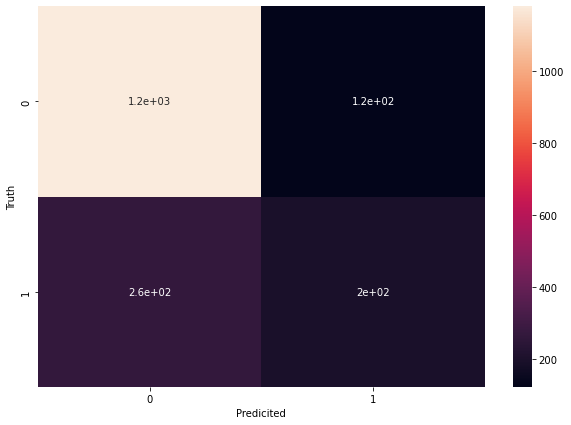

In [279]:
display(cm)

# heatmap isn't helpful as our y is catigorical, and not numerical
plt.figure(figsize = (10,7))
sb.heatmap(cm, annot = True)
plt.xlabel('Predicited')
plt.ylabel('Truth')

In [280]:
display(cm)


display(cm_down)


display(cm_up)

array([[1181,  122],
       [ 263,  195]], dtype=int64)

array([[303, 133],
       [131, 368]], dtype=int64)

array([[985, 309],
       [364, 929]], dtype=int64)